Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv("data_train.csv")
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Train data file has 10683 rows and 11 columns

In [3]:
test = pd.read_excel('Test_set.xlsx')
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


Test data file has 2671 rows and 10 columns

# Checking null values in Training and Test Dataset

In [4]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

route and total stops column has 1 null values each

In [5]:
train[train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


we see that the same null values are in the same row

In [6]:
#dropp;ing the null value column 
train=train.dropna(axis=0, how='any')

In [7]:

train.shape

(10682, 11)

In [8]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:

test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Test has 0 null values

In [10]:
test.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No missing values in Test dataset, and the missing value row in Training dataset has been removed.

Looking at the dataset,
there are 4 columns with date-time variables and we need to apply featrure engineering to those columns

In [11]:
train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
40h 20m      1
27h 30m      1
32h 20m      1
36h 25m      1
33h 20m      1
Name: Duration, Length: 368, dtype: int64

In [12]:
duration_train = list(train["Duration"])
duration_train

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [13]:

import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#applying loop to separate hours from minutes
for i in range(len(duration_train)):
    if len(duration_train[i].split()) != 2:   
        if "h" in duration_train[i]:
            duration_train[i] = duration_train[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_train[i] = '0h '+ duration_train[i]           # add 0 hour

In [14]:

duration_train

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [15]:
duration_hours = []
duration_mins = []
for i in range(len(duration_train)):
    duration_hours.append(int(duration_train[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_train[i].split(sep = "m")[0].split()[-1]))

In [16]:
train['Duration_hrs'] = duration_hours
train['Duration_hrs']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hrs, Length: 10682, dtype: int64

In [17]:
train['Duration_mins'] = duration_mins
train['Duration_mins']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_mins, Length: 10682, dtype: int64

In [18]:
train.drop('Duration', axis=1, inplace=True)

In [19]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2 stops,No info,7662,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2 stops,No info,13882,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1 stop,No info,6218,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1 stop,No info,13302,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,non-stop,No info,4107,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,non-stop,No info,4145,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,non-stop,No info,7229,3,0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,non-stop,No info,12648,2,40


# 'Date_of_Journey', 'Dep_Time', & 'Arrival_Time' columns also needs to be converted 

In [20]:
train['Day_of_Journey']=pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y').dt.day
train['Month_of_Journey']=pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y').dt.month
train.drop('Date_of_Journey', axis = 1, inplace = True)

In [21]:
train['Dep_hr'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_min'] = pd.to_datetime(train['Dep_Time']).dt.minute
train.drop('Dep_Time', axis = 1, inplace = True)

In [22]:
train['Arrival_hr'] = pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_min'] = pd.to_datetime(train['Arrival_Time']).dt.minute
train.drop('Arrival_Time', axis = 1, inplace = True)

In [23]:
 train.shape

(10682, 15)

In [24]:
train.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Duration_hrs         int64
Duration_mins        int64
Day_of_Journey       int64
Month_of_Journey     int64
Dep_hr               int64
Dep_min              int64
Arrival_hr           int64
Arrival_min          int64
dtype: object

In [25]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


Need to convert the same columns in test

In [34]:
duration_test= list(test["Duration"])
duration_test

for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:   
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_test[i] = '0h '+ duration_test[i]           # add 0 hour


In [35]:
duration_hours = []
duration_mins = []
for i in range(len(duration_test)):
    duration_hours.append(int(duration_test[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_test[i].split(sep = "m")[0].split()[-1]))


In [36]:

test['Duration_hrs'] = duration_hours
test['Duration_hrs']


0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hrs, Length: 2671, dtype: int64

In [37]:

test['Duration_mins'] = duration_mins
test['Duration_mins']


0       55
1        0
2       45
3        0
4       50
        ..
2666    55
2667    35
2668    35
2669    15
2670    20
Name: Duration_mins, Length: 2671, dtype: int64

In [38]:
test.drop('Duration', axis=1, inplace=True)

In [40]:
test['Day_of_Journey']=pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y').dt.day
test['Month_of_Journey']=pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y').dt.month
test.drop('Date_of_Journey', axis = 1, inplace = True)

In [41]:
test['Dep_hr'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_min'] = pd.to_datetime(test['Dep_Time']).dt.minute
test.drop('Dep_Time', axis = 1, inplace = True)

In [42]:
test['Arrival_hr'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arrival_min'] = pd.to_datetime(test['Arrival_Time']).dt.minute
test.drop('Arrival_Time', axis = 1, inplace = True)

In [46]:
test.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Duration_hrs         int64
Duration_mins        int64
Day_of_Journey       int64
Month_of_Journey     int64
Dep_hr               int64
Dep_min              int64
Arrival_hr           int64
Arrival_min          int64
dtype: object

# Target Variable determination of Classification/Regression problem 

Target variable is Price 

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Price",data=train)
plt.show()

In [26]:
train['Price'].nunique

<bound method IndexOpsMixin.nunique of 0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64>

The Target values are more than 2 and hence this is a regression Problem

# Regression Problem

# Label Encoding 

In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train=train.apply(label_encoder.fit_transform)

In [28]:
df_train.dtypes

Airline             int32
Source              int32
Destination         int32
Route               int32
Total_Stops         int32
Additional_Info     int32
Price               int64
Duration_hrs        int64
Duration_mins       int64
Day_of_Journey      int64
Month_of_Journey    int64
Dep_hr              int64
Dep_min             int64
Arrival_hr          int64
Arrival_min         int64
dtype: object

all columns are converted to int

Applying the same for test dataset

In [48]:
df_test=test.apply(label_encoder.fit_transform)

In [49]:
df_test.dtypes

Airline             int32
Source              int32
Destination         int32
Route               int32
Total_Stops         int32
Additional_Info     int32
Duration_hrs        int64
Duration_mins       int64
Day_of_Journey      int64
Month_of_Journey    int64
Dep_hr              int64
Dep_min             int64
Arrival_hr          int64
Arrival_min         int64
dtype: object

All the columns are in same dtype like train dataframe

In [52]:
df_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,4,2,1,76,0,5,10,11,2,3,17,6,4,5
1,3,3,0,65,0,5,4,0,4,2,6,4,10,4
2,4,2,1,76,0,3,23,9,7,2,19,3,19,0
3,6,2,1,76,0,5,13,0,7,2,8,0,21,0
4,0,0,2,16,4,5,2,10,8,3,23,11,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,5,23,11,2,3,20,6,20,5
2667,3,3,0,43,4,5,2,7,9,0,14,4,16,11
2668,4,2,1,76,0,5,6,7,2,0,21,10,4,5
2669,1,2,1,76,0,5,15,3,2,0,4,0,19,3


In [53]:
df_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,3,0,5,18,4,8,65,2,10,8,0,22,4,1,2
1,1,3,0,84,1,8,669,7,5,0,2,5,10,13,3
2,4,2,1,118,1,8,1537,19,0,3,3,9,5,4,5
3,3,3,0,91,0,8,389,5,5,4,2,18,1,23,6
4,3,0,5,29,0,8,1457,4,9,0,0,16,10,21,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,8,81,2,6,3,1,19,11,22,5
10679,1,3,0,64,4,8,84,2,7,9,1,20,9,23,4
10680,4,0,2,18,4,8,604,3,0,9,1,8,4,11,4
10681,10,0,5,18,4,8,1377,2,8,0,0,11,6,14,2


<AxesSubplot:xlabel='Airline', ylabel='Density'>

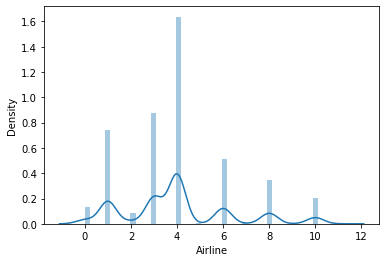

In [54]:
sns.distplot(df_train['Airline'])

<AxesSubplot:xlabel='Source', ylabel='Density'>

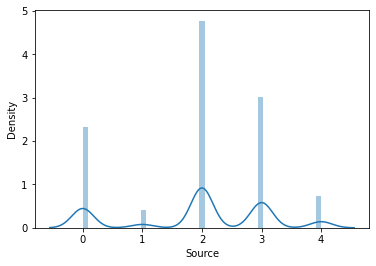

In [55]:
sns.distplot(df_train['Source'])

<AxesSubplot:xlabel='Destination', ylabel='Density'>

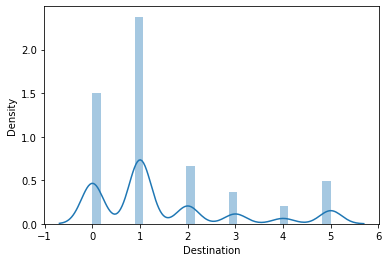

In [56]:
sns.distplot(df_train['Destination'])

<AxesSubplot:xlabel='Route', ylabel='Density'>

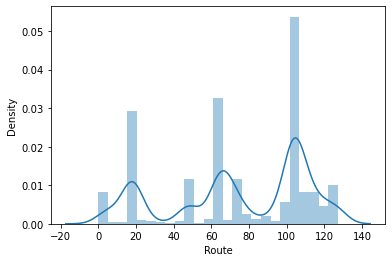

In [57]:
sns.distplot(df_train['Route'])

<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

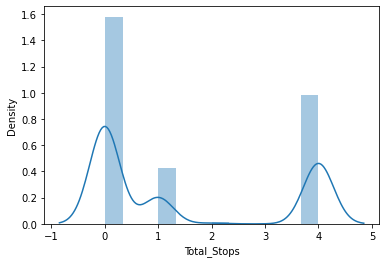

In [58]:
sns.distplot(df_train['Total_Stops'])

<AxesSubplot:xlabel='Additional_Info', ylabel='Density'>

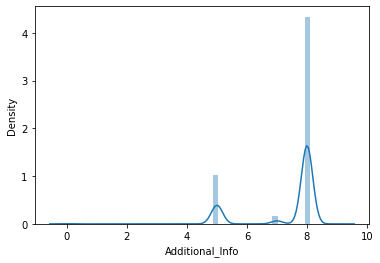

In [59]:
sns.distplot(df_train['Additional_Info'])

<AxesSubplot:xlabel='Duration_hrs', ylabel='Density'>

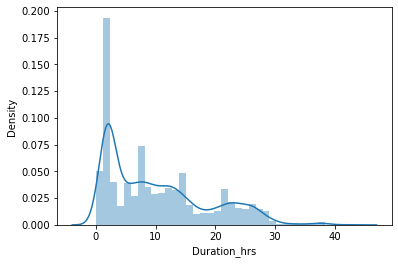

In [60]:
sns.distplot(df_train['Duration_hrs'])

<AxesSubplot:xlabel='Duration_mins', ylabel='Density'>

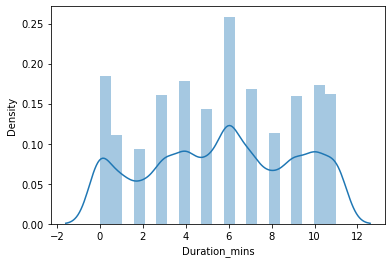

In [61]:
sns.distplot(df_train['Duration_mins'])

<AxesSubplot:xlabel='Day_of_Journey', ylabel='Density'>

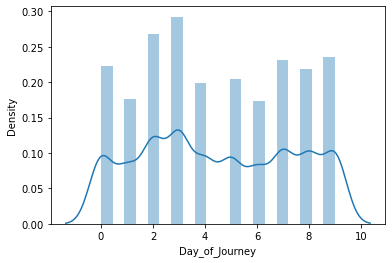

In [62]:
sns.distplot(df_train['Day_of_Journey'])

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Density'>

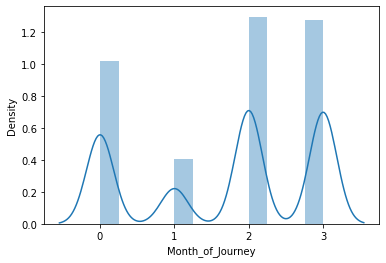

In [63]:
sns.distplot(df_train['Month_of_Journey'])

<AxesSubplot:xlabel='Dep_hr', ylabel='Density'>

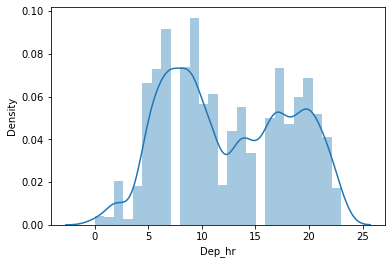

In [64]:
sns.distplot(df_train['Dep_hr'])

<AxesSubplot:xlabel='Dep_min', ylabel='Density'>

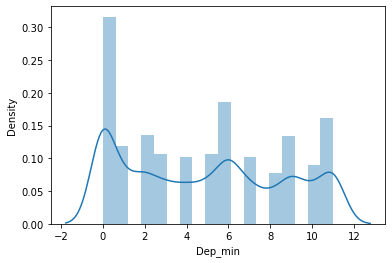

In [65]:
sns.distplot(df_train['Dep_min'])

<AxesSubplot:xlabel='Arrival_hr', ylabel='Density'>

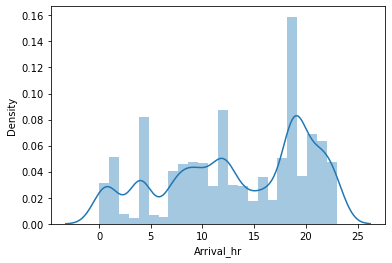

In [66]:
sns.distplot(df_train['Arrival_hr'])

<AxesSubplot:xlabel='Arrival_min', ylabel='Density'>

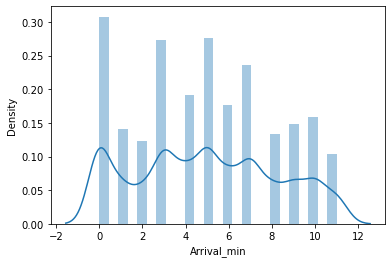

In [67]:
sns.distplot(df_train['Arrival_min'])

All columns are not normally distributed

# To find the Outliers 

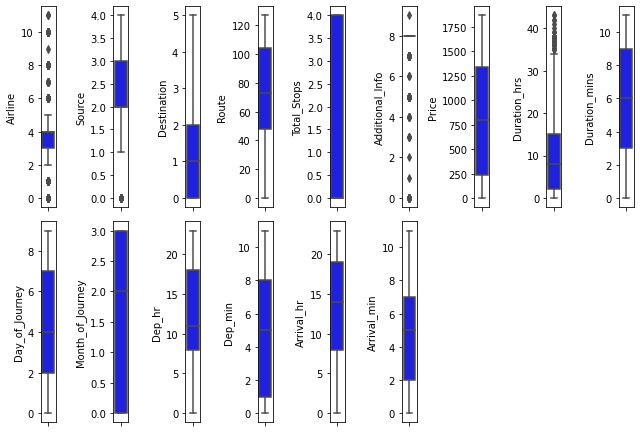

In [69]:
collist=df_train.columns.values
ncol= 9
nrows= 9

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=df_train[collist[i]], color='blue', orient='x')
    plt.tight_layout()

Airline,source,Additional_Info,Duration_hrs columns have outliers 

# TO remove the skewness

In [70]:
df_train.skew()

Airline             0.731057
Source             -0.424023
Destination         1.244046
Route              -0.501911
Total_Stops         0.631532
Additional_Info    -1.779689
Price               0.114323
Duration_hrs        0.847945
Duration_mins      -0.090680
Day_of_Journey      0.067501
Month_of_Journey   -0.387409
Dep_hr              0.112924
Dep_min             0.167234
Arrival_hr         -0.370146
Arrival_min         0.110945
dtype: float64

In [71]:
cor=df_train.corr()
cor

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
Airline,1.000000,-0.013397,0.018446,0.025214,0.035973,-0.060748,-0.043069,-0.158194,-0.028009,0.026015,0.024674,-0.035269,-0.059922,-0.007567,-0.071092
Source,-0.013397,1.000000,-0.592576,0.403412,-0.225605,-0.022109,0.085125,0.166177,-0.145193,0.004932,0.183268,0.059047,-0.056998,0.025635,0.021040
Destination,0.018446,-0.592576,1.000000,-0.461176,0.337872,0.026821,-0.156214,-0.258513,0.061235,-0.041286,-0.364682,-0.072997,0.127931,-0.039729,0.017196
Route,0.025214,0.403412,-0.461176,1.000000,-0.437749,0.035152,0.243267,0.295478,-0.232427,0.082993,0.244186,-0.075002,-0.068071,0.013898,-0.173352
Total_Stops,0.035973,-0.225605,0.337872,-0.437749,1.000000,0.164054,-0.653305,-0.606333,0.182223,0.029019,-0.026328,0.039224,0.048901,-0.095650,0.175980
Additional_Info,-0.060748,-0.022109,0.026821,0.035152,0.164054,1.000000,-0.078433,-0.168920,0.046910,-0.014789,-0.051491,-0.050983,-0.019392,0.026204,0.041310
Price,-0.043069,0.085125,-0.156214,0.243267,-0.653305,-0.078433,1.000000,0.600437,-0.147198,-0.122936,-0.045412,0.010022,-0.046707,0.043465,-0.107606
Duration_hrs,-0.158194,0.166177,-0.258513,0.295478,-0.606333,-0.168920,0.600437,1.000000,-0.126470,-0.022073,0.016277,0.002878,-0.022079,0.055326,-0.074545
Duration_mins,-0.028009,-0.145193,0.061235,-0.232427,0.182223,0.046910,-0.147198,-0.126470,1.000000,-0.009223,-0.040897,-0.023707,0.092485,-0.118309,0.151628
Day_of_Journey,0.026015,0.004932,-0.041286,0.082993,0.029019,-0.014789,-0.122936,-0.022073,-0.009223,1.000000,-0.037684,0.001713,-0.008327,-0.003483,-0.017738


<AxesSubplot:>

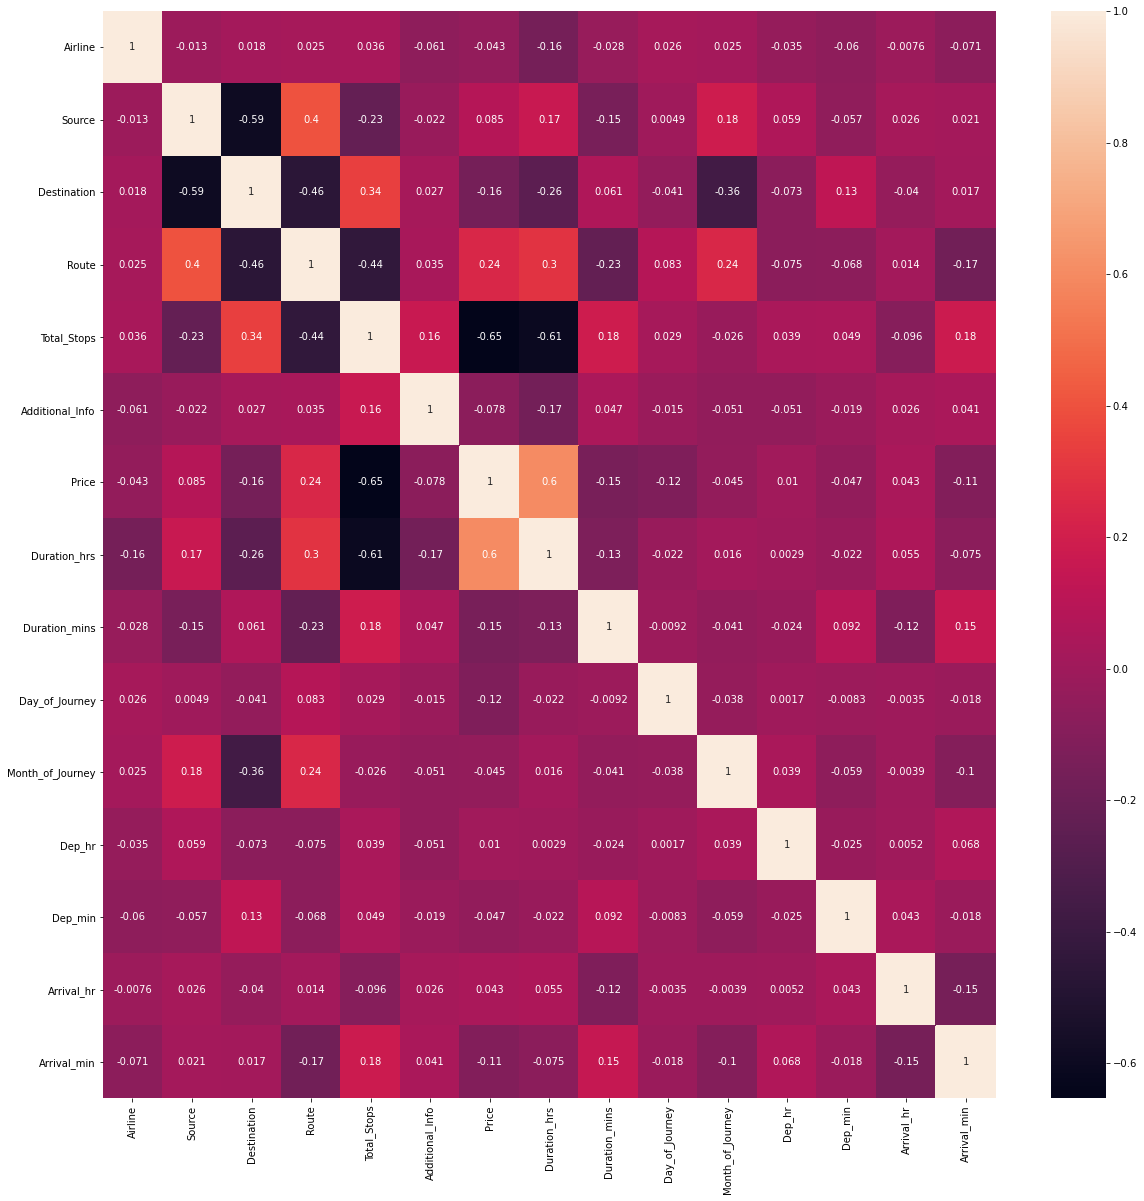

In [72]:
import matplotlib.pyplot as plt
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='r')

# Removing Outliers

In [74]:
from scipy.stats import zscore

z=np.abs(zscore(df_train))

df2_train=df_train[(z<3).all(axis=1)]

In [75]:
df2_train.shape

(10591, 15)

In [76]:
df_train.shape

(10682, 15)

10692-10591/10692 =0.9%

Outliers are less hence new data to be considered 


In [77]:
z=np.abs(zscore(df_test))

df2_test=df_test[(z<3).all(axis=1)]

In [79]:
df2_test.shape

(2650, 14)

In [80]:
df_test.shape

(2671, 14)

# Variance Inflation Factor to find multi collinearity

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
vif_data = pd.DataFrame()
vif_data["feature"] = df2_train.columns

In [83]:
vif_data["VIF"] = [variance_inflation_factor(df2_train.values, i)
                            for i in range(len(df2_train.columns))]
print(vif_data)

             feature        VIF
0            Airline   3.773847
1             Source   5.702032
2        Destination   3.347249
3              Route   8.133780
4        Total_Stops   3.972926
5    Additional_Info  26.419312
6              Price   6.088908
7       Duration_hrs   4.649424
8      Duration_mins   4.028415
9     Day_of_Journey   3.420956
10  Month_of_Journey   3.655966
11            Dep_hr   5.589662
12           Dep_min   2.746527
13        Arrival_hr   4.741981
14       Arrival_min   3.495599


Additional_Info  has high value so we can drop the same 

In [84]:

df2_train.drop('Additional_Info', axis=1, inplace=True)

In [85]:

df2_test.drop('Additional_Info', axis=1, inplace=True)

# Creation of dependent and independant variable

In [88]:
x=df2_train.drop('Price',axis=1)
y=df2_train['Price']

In [89]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [90]:

plt.figure(figsize = (10,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


NameError: name 'selection' is not defined

<Figure size 720x576 with 0 Axes>

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=20)

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state=0)

# Training Models

# Linear Regression

In [104]:

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=10)

In [106]:
lr.fit(x_train,y_train)

LinearRegression()

In [107]:
pred_test=lr.predict(x_test)

In [108]:
print(r2_score(y_test,pred_test))

0.5043823904803815


In [109]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(lr, x_train, y_train, scoring='r2', cv=5)
scores.mean() 

0.5156333062172458

# Lasso Regressor¶


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [130]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [131]:
ls = Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5174720079655974

In [110]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [111]:

ls = Lasso(alpha=0.011,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.5043842464683783

In [112]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5134648663983292

# Random Forest¶


In [116]:
rf= RandomForestRegressor(criterion="mse", max_features ="auto")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 82.61251167629204
Cross Val Score: 83.73213086689762


In [ ]:
R2-CV Score 

Linear      = 51.56-50.44 =1.12
Lasso = 50.43-51.34 = 0.81
Random forest = 82.6-83.7 = 1.1



Lassso regression has the least value hence fitting the Lasso regressor model 

In [117]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
x, y = make_classification(n_samples=10, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = Lasso()
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: nan (nan)


In [121]:
import pickle
filename = 'flightpricepredictions.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [122]:
loaded_model = pickle.load(open('flightpricepredictions.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8261251167629204


In [125]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Orginal"])


In [126]:
import pickle
# dump information to the file
pickle.dump(model, open('flightpricepredictions.pkl', 'wb'))


In [132]:
model = pickle.load(open('flightpricepredictions.pkl', 'rb'))